In [1]:
import rdflib
from rdflib import URIRef, Literal, Graph, Namespace

import pandas as pd
from itertools import chain


from rdflib.namespace import RDF, RDFS
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML

import owlready2 as owlr

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g


serial = owlr.get_ontology("Serialization.owl").load()
def flush(onto):
    for m in onto.classes():
        print(m, m.is_a)
flush(serial)
owlr.sync_reasoner(serial)

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MappingMetaTarget belongs to more than one entity types: [owl.AnnotationProperty, owl.ObjectProperty, owl.topObjectProperty]; I'm trying to fix it...
* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmpkg5uo3_t


Serialization.Meta [Serialization.SerializationMetaData]
Serialization.Mapping [Serialization.SerializationSpecs]
Serialization.BatchDefinition [Serialization.SerializationSpecs]
Serialization.SerializationSpecs [Serialization.SerializationMetaData]
Serialization.BatchNode [Serialization.DataLoad]
Serialization.DataLoad [Serialization.SerializationMetaData]
Serialization.SerializationMetaData [owl.Thing]
Serialization.DataPropertyMapping [Serialization.Mapping]
Serialization.MetaDataProperty [Serialization.Meta]
Serialization.EntityMapping [Serialization.Mapping]
Serialization.MetaClass [Serialization.Meta]
Serialization.JobNode [Serialization.DataLoad]
Serialization.MetaProperty [Serialization.Meta]
Serialization.PropertyMapping [Serialization.Mapping]
Serialization.RowNode [Serialization.DataLoad]
Serialization.Serialization [Serialization.SerializationSpecs]


* Owlready2 * HermiT took 0.5180630683898926 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [2]:
s_graph = Graph()
s_graph.parse("EntityAttributeRecord.rdf")

<Graph identifier=N8ad7a82d2e8a440cb3d4048d6aa78ced (<class 'rdflib.graph.Graph'>)>

In [3]:
mapping_uri = URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#Mapping')
serialization_uri = URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#Serialization')
contains_mapping_uri = URIRef(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#ContainsMapping'))
mapping_meta_target_uri = URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#MappingMetaTarget')

In [4]:
RDFS.label

rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label')

In [5]:
serialization_instances = [a for a,b,c in s_graph.triples((None,None,URIRef(serial.Serialization.iri)))]
serialization_instances
{ l.value : s for i in serialization_instances for s,p,l in s_graph.triples((i, RDFS.label, None))}

{'EntityAttributeRecord': rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord')}

In [6]:
def return_serialization_labels(s_graph):
    serialization_instances = [a for a,b,c in s_graph.triples((None,None,URIRef(serial.Serialization.iri)))]
    
    serial_instance_dict_by_label = { l.value : s for i in serialization_instances for s,p,l in s_graph.triples((i, RDFS.label, None))}
    
    return serial_instance_dict_by_label
return_serialization_labels(s_graph)

{'EntityAttributeRecord': rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord')}

In [7]:
defined_serializations = [a for a,b,c in s_graph.triples((None,None,URIRef(serial.Serialization.iri)))]

#def get_ser(g,n):
for d in defined_serializations:
    print({o.value:s for s,p,o in s_graph.triples((d,RDFS.label,None))})
print(defined_serializations)

{}
{'EntityAttributeRecord': rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord')}
[rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipRecord'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord')]


In [8]:
defined_mappings = [z for a,b,c in s_graph.triples((None, None, serialization_uri)) for x,y,z in s_graph.triples((a,contains_mapping_uri,None)) if a == defined_serializations[0]]

In [9]:
for i,r in pd.DataFrame([(a,c,[t for r,s,t in s_graph.triples((c,None,None))][0]) for m in defined_mappings for a,b,c in s_graph.triples((m, mapping_meta_target_uri, None)) ]).iterrows():
    rec=[]
    for u in r:
        rec.append(u.split("#")[-1])
    print(" ".join(rec))



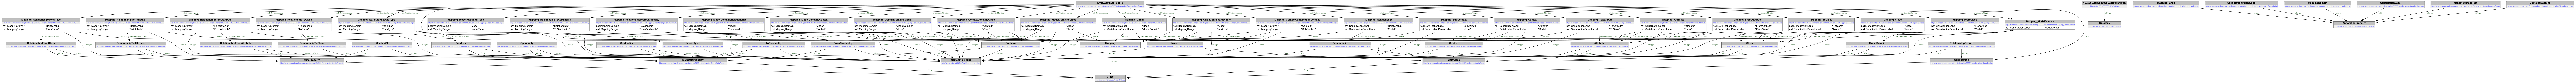

In [10]:
visualize(s_graph)

In [11]:
serial.PropertyMapping.iri

'http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#PropertyMapping'

In [12]:
import serialization

Serialization.Meta [Serialization.SerializationMetaData]
Serialization.Mapping [Serialization.SerializationSpecs]
Serialization.BatchDefinition [Serialization.SerializationSpecs]
Serialization.SerializationSpecs [Serialization.SerializationMetaData]
Serialization.BatchNode [Serialization.DataLoad]
Serialization.DataLoad [Serialization.SerializationMetaData]
Serialization.SerializationMetaData [owl.Thing]
Serialization.DataPropertyMapping [Serialization.Mapping]
Serialization.MetaDataProperty [Serialization.Meta]
Serialization.EntityMapping [Serialization.Mapping]
Serialization.MetaClass [Serialization.Meta]
Serialization.JobNode [Serialization.DataLoad]
Serialization.MetaProperty [Serialization.Meta]
Serialization.PropertyMapping [Serialization.Mapping]
Serialization.RowNode [Serialization.DataLoad]
Serialization.Serialization [Serialization.SerializationSpecs]


* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmp2wnpvgs1
* Owlready2 * HermiT took 0.4825170040130615 seconds
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [13]:
S = serialization.Serialization(s_graph, "EntityAttributeRecord")

 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_ModelDomain class {'SerializationLabel_uri': rdflib.term.Literal('ModelDomain')}
 -----------------------
 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_AttributeHasDataType dataproperty {'MappingDomain_uri': rdflib.term.Literal('Attribute'), 'MappingRange_uri': rdflib.term.Literal('DataType')}
 -----------------------
 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_ClassContainsAttribute property {'MappingDomain_uri': rdflib.term.Literal('Class'), 'MappingRange_uri': rdflib.term.Literal('Attribute')}
 -----------------------
 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_RelationshipFromAttribute property {'MappingDomain_uri': rdflib.term.Literal('Relationship'), 'MappingRange_uri': rdflib.term.Literal('FromAttribute')}
 -----------------------
 -------------

In [14]:
S.return_serialization_labels()

{'EntityAttributeRecord': 'http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord'}

In [15]:
S.serialization

'http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#EntityAttributeRecord'

In [16]:
S.get_mappings()

 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_ModelDomain class {'SerializationLabel_uri': rdflib.term.Literal('ModelDomain')}
 -----------------------
 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_AttributeHasDataType dataproperty {'MappingDomain_uri': rdflib.term.Literal('Attribute'), 'MappingRange_uri': rdflib.term.Literal('DataType')}
 -----------------------
 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_ClassContainsAttribute property {'MappingDomain_uri': rdflib.term.Literal('Class'), 'MappingRange_uri': rdflib.term.Literal('Attribute')}
 -----------------------
 -----------------------
http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Mapping_RelationshipFromAttribute property {'MappingDomain_uri': rdflib.term.Literal('Relationship'), 'MappingRange_uri': rdflib.term.Literal('FromAttribute')}
 -----------------------
 -------------

In [17]:
dir(S.mappings[4])

['SerializationLabel',
 'SerializationParentLabel',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_mapping',
 'defs',
 'graph',
 'mapping_meta_target',
 'mapping_subtype',
 'name',
 'ontology',
 'serialization']

In [18]:
S.lineage_tree

{'FromAttribute': 'FromClass',
 'SubContext': 'Model',
 'Attribute': 'Class',
 'FromClass': 'Model',
 'Model': 'ModelDomain',
 'Context': 'Model',
 'ToClass': 'Model',
 'ToAttribute': 'ToClass',
 'Class': 'Model',
 'Relationship': 'Model'}

In [19]:
for m in S.mappings:
    
    print(m.mapping_subtype) 
    for a in ["MappingRange", "MappingDomain", "SerializationLabel","SerializationParentLabel", "mapping_meta_target" ]:
        if hasattr(m,a):
            print("\t", a, ":", getattr(m,a))

class
	 SerializationLabel : ModelDomain
	 mapping_meta_target : http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelDomain
dataproperty
	 MappingRange : DataType
	 MappingDomain : Attribute
	 mapping_meta_target : http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#DataType
property
	 MappingRange : Attribute
	 MappingDomain : Class
	 mapping_meta_target : http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains
property
	 MappingRange : FromAttribute
	 MappingDomain : Relationship
	 mapping_meta_target : http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#RelationshipFromAttribute
class
	 SerializationLabel : FromAttribute
	 SerializationParentLabel : FromClass
	 mapping_meta_target : http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Attribute
class
	 SerializationLabel : SubContext
	 SerializationParentLabel : Model
	 mapping_meta_target : http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Context
property
	 MappingRange : 

In [20]:
m.serialization.lineage_tree

{'FromAttribute': 'FromClass',
 'SubContext': 'Model',
 'Attribute': 'Class',
 'FromClass': 'Model',
 'Model': 'ModelDomain',
 'Context': 'Model',
 'ToClass': 'Model',
 'ToAttribute': 'ToClass',
 'Class': 'Model',
 'Relationship': 'Model'}

In [21]:
row = {"ModelDomain" : "MD_0", 
       "Model" : "XYZ_Model", 
       "ModelType" : "Physical",
       "Class" : "PERSON", 
       "Attribute" : "NAME", 
       "DataType" : "string"
       
       }

data = S.extract_raw_triples(row)

In [29]:
g=Graph()
serns = Namespace(serial.base_iri)
g.bind('ser', serns, override=True, replace=True)

for t in data:
    g.add(t)

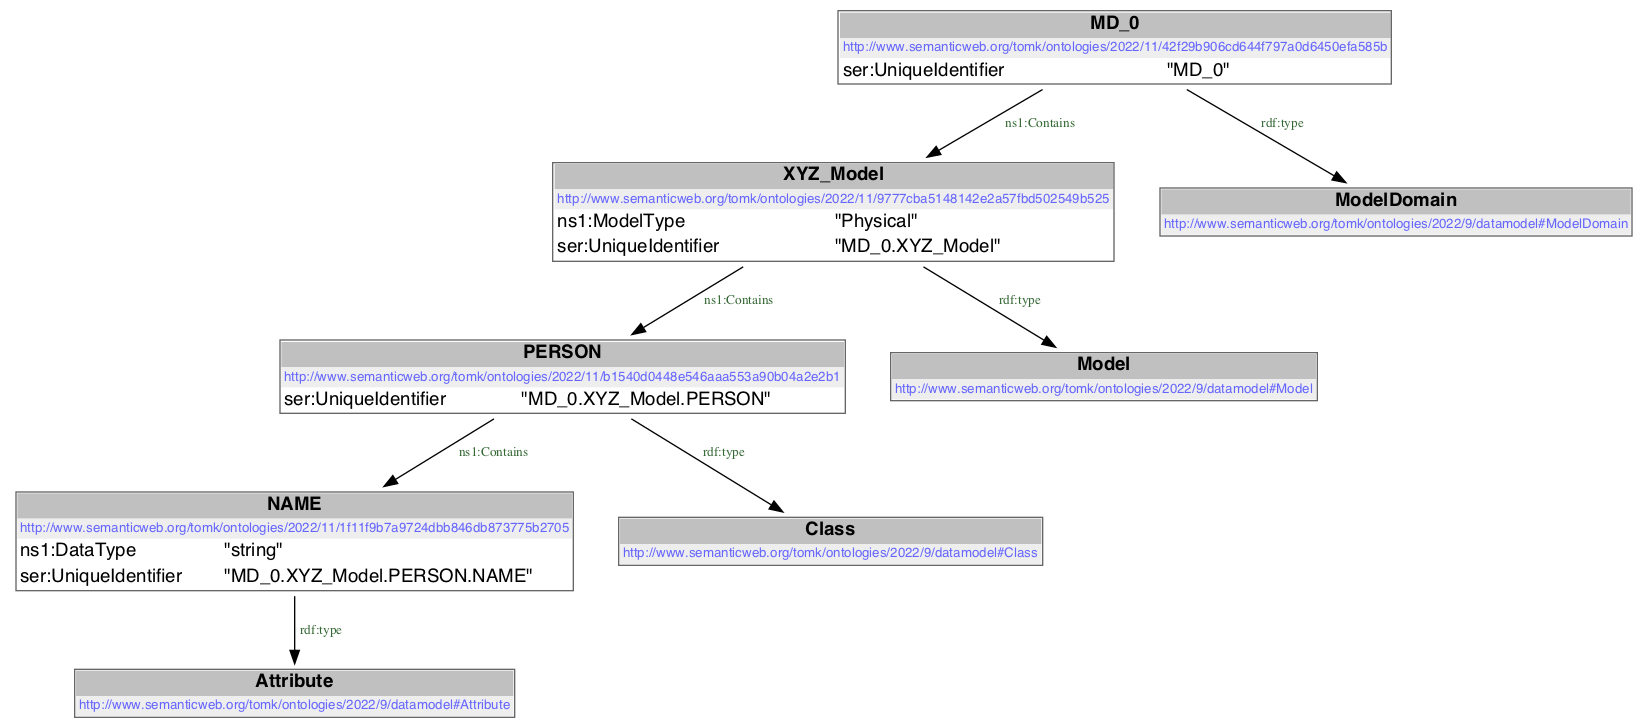

In [30]:
visualize(g)

In [39]:
new_row = {"ModelDomain" : "MD_0", 
       "Model" : "XYZ_Model", 
       "ModelType" : "Physical",
       "Class" : "PERSON", 
       "Attribute" : "DATEOFBIRTH", 
       "DataType" : "datetime"
       
       }

new_data = S.extract_raw_triples(new_row)

In [40]:
ng = Graph()
serns = Namespace(serial.base_iri)
ng.bind('ser', serns, override=True, replace=True)


In [41]:
set(data).intersection(S.master_triples(g,new_data))

{(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/42f29b906cd644f797a0d6450efa585b'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/serialization#UniqueIdentifier'),
  rdflib.term.Literal('MD_0')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/42f29b906cd644f797a0d6450efa585b'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/9777cba5148142e2a57fbd502549b525')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/42f29b906cd644f797a0d6450efa585b'),
  rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
  rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelDomain')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/11/42f29b906cd644f797a0d6450efa585b'),
  rdflib.term.URIRef('http://www.w3.org/2000/01/rd

In [44]:
mastered_deltas = set(S.master_triples(g,new_data))-set(data)

In [45]:
for t in mastered_deltas:
    g.add(t)

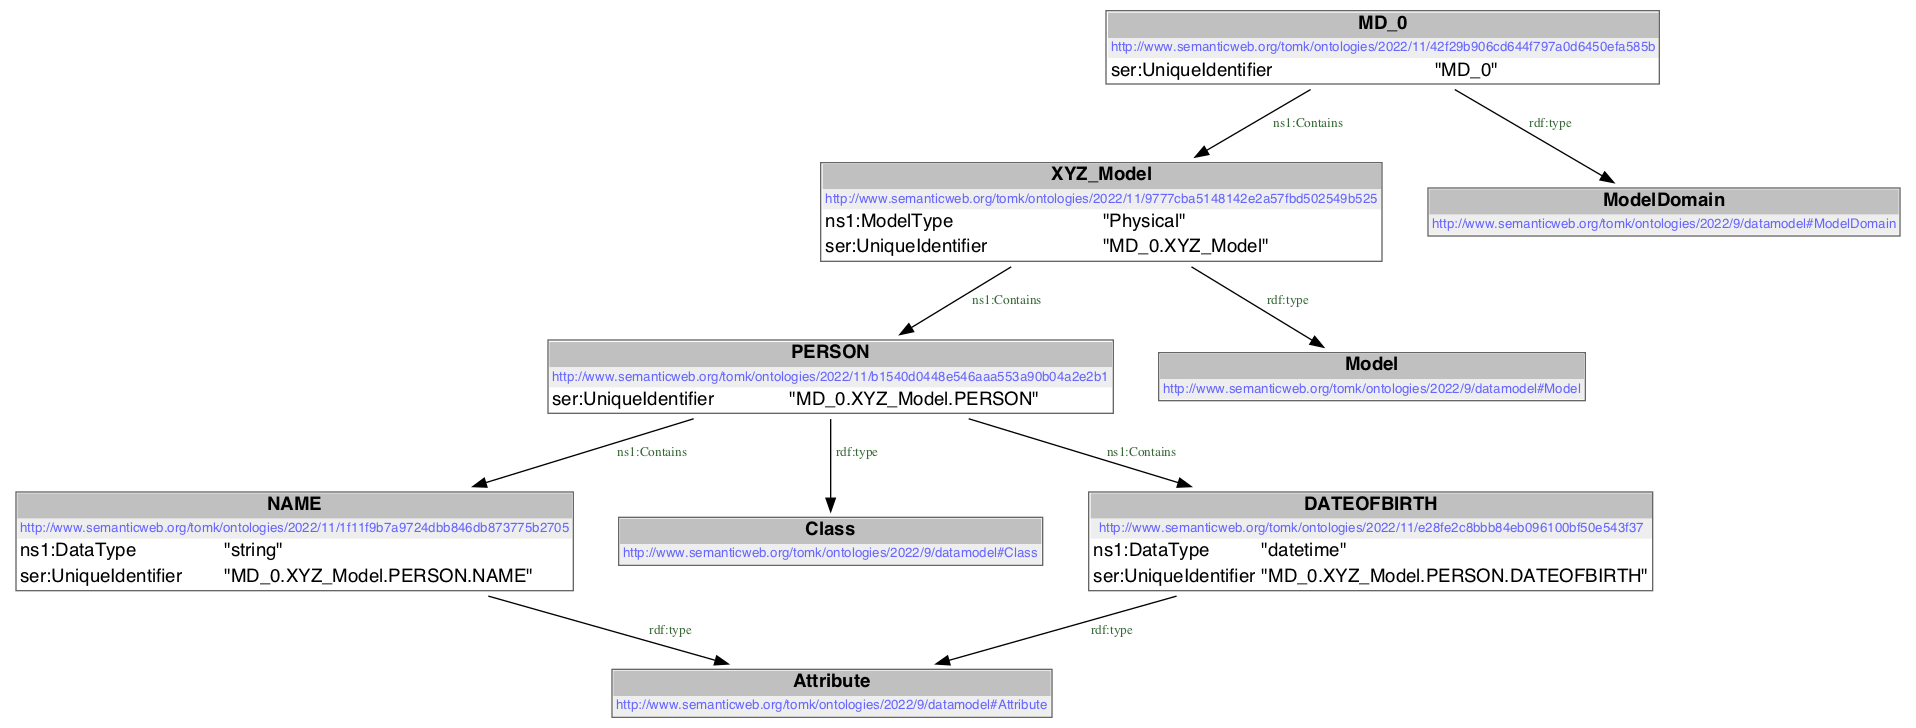

In [46]:
visualize(g)

In [27]:
assert False

AssertionError: 

In [ ]:
    MappingDomain_uri = URIRef(serial.MappingDomain.iri)
    MappingRange_uri = URIRef(serial.MappingRange.iri)
    SerializationLabel_uri = URIRef(serial.SerializationLabel.iri)
    SerializationParentLabel_uri = URIRef(serial.SerializationParentLabel.iri)


{p:o for q in [MappingDomain_uri, MappingRange_uri, SerializationLabel_uri, SerializationParentLabel_uri] for s,p,o in s_graph.triples((m, q, None))}

In [ ]:
dir(serial)